# Comparative Analysis: AI Keyword Density, LDA vs BERTopic
This notebook performs AI keyword density analysis, LDA and BERTopic topic modeling on multiple document sets and compares their results.

## 1. Setup & Imports

In [2]:
import os
import re
import warnings
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# NLP & Topic Modeling
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from gensim import corpora, models
from gensim.models import CoherenceModel

from bertopic import BERTopic

# Ensure UTF-8 output
import sys
os.environ['PYTHONUTF8'] = '1'
if hasattr(sys.stdout, 'reconfigure'):
    sys.stdout.reconfigure(encoding='utf-8')
warnings.filterwarnings('ignore')


## 2. NLTK Data Download

In [3]:
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)


True

## 3. Configuration

In [4]:
# Paths to datasets
FOLDER_PATHS = {
    "Part 1": r"C:\Users\91756\Downloads\Master_thesis\Parsed_Content\Parsed_Content\parsed_content_links_list_part_1",
    "Part 2": r"C:\Users\91756\Downloads\Master_thesis\Parsed_Content\Parsed_Content\parsed_content_links_list_part_2",
    "Part 3": r"C:\Users\91756\Downloads\Master_thesis\Parsed_Content\Parsed_Content\parsed_content_links_list_part_3",
    "Part 4": r"C:\Users\91756\Downloads\Master_thesis\Parsed_Content\Parsed_Content\parsed_content_links_list_part_4"
}

# LDA parameters
NUM_TOPICS = 8
LDA_PASSES = 10

# AI Keywords for density analysis
AI_KEYWORDS = {
    "ai", "artificial intelligence", "machine learning", "deep learning", "neural network", "generative ai",
    "supervised learning", "unsupervised learning", "reinforcement learning", "transfer learning",
    "federated learning", "attention mechanism", "llm", "gpt", "bert", "diffusion model", "gan", "rnn", "cnn",
    "vlm", "gpt-4v", "llava", "nlp", "computer vision", "speech recognition", "autonomous systems",
    "recommender system", "robotic process automation", "tensorflow", "pytorch", "keras", "huggingface",
    "langchain", "openai", "anthropic", "mistral ai", "agi", "multimodal ai", "few-shot learning",
    "prompt engineering", "retrieval-augmented generation", "ai agents", "autonomous agents",
    "multi-agent systems", "embodied ai", "agent tool use", "llamaindex", "crewai", "autogen", "agentops",
    "semantic kernel", "haystack", "weaviate", "pinecone", "qdrant", "chroma", "transformers", "peft",
    "fastapi", "gradio", "streamlit", "guardrails", "rebuff", "guidance", "openai api", "gpt-4",
    "gpt-4-turbo", "embeddings", "moderation", "anthropic claude api", "claude 3", "google vertex ai",
    "palm 2", "gemini", "mistral ai api", "mistral 7b", "mixtral 8x7b", "cohere api", "command-r",
    "meta llama api", "llama 2", "llama 3", "perplexity api", "openai gpt-4v", "google gemini api",
    "anthropic claude 3 vision", "huggingface inference api", "blip-2", "llava", "openai whisper",
    "elevenlabs", "deepgram", "assemblyai", "google cloud vision", "aws rekognition",
    "azure computer vision", "roboflow", "openai embeddings", "cohere embed", "langchain api",
    "stability ai", "microsoft semantic kernel"
}


## 4. Preprocessing Function

In [5]:
def preprocess_text(text):
    """Lowercase, remove non-alpha, tokenize, remove stopwords."""
    text = text.lower() if isinstance(text, str) else ''
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stops = set(stopwords.words('english'))
    return [w for w in tokens if w not in stops and len(w) > 1]


## 5. Load Documents

In [6]:
# Load raw text for each folder
documents_by_folder = {}
for label, path in FOLDER_PATHS.items():
    docs = []
    for fname in os.listdir(path):
        if fname.lower().endswith('.txt'):
            with open(os.path.join(path, fname), 'r', encoding='utf-8', errors='ignore') as f:
                docs.append(f.read())
    documents_by_folder[label] = docs
    print(f"Loaded {len(docs)} documents for {label}")


Loaded 4370 documents for Part 1
Loaded 4015 documents for Part 2
Loaded 4359 documents for Part 3
Loaded 4396 documents for Part 4


## 6. AI Keyword Density Analysis

In [7]:
def analyze_ai_density(text):
    words = preprocess_text(text)
    if not words:
        return 0.0
    ai_count = sum(1 for w in words if w in AI_KEYWORDS)
    return ai_count / len(words) * 100

# Compute per-folder AI % distributions
ai_density_results = {}
for label, docs in documents_by_folder.items():
    densities = [analyze_ai_density(doc) for doc in docs]
    ai_density_results[label] = densities
    print(f"{label}: Mean AI density = {np.mean(densities):.2f}%, Median = {np.median(densities):.2f}%")


Part 1: Mean AI density = 1.21%, Median = 0.17%
Part 2: Mean AI density = 1.29%, Median = 0.22%
Part 3: Mean AI density = 1.25%, Median = 0.22%
Part 4: Mean AI density = 1.27%, Median = 0.20%


## 7. LDA Topic Modeling

In [8]:
from gensim import corpora

lda_results = {}
for label, docs in documents_by_folder.items():
    texts = [preprocess_text(doc) for doc in docs]
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    lda = models.LdaModel(corpus, id2word=dictionary, num_topics=NUM_TOPICS, passes=LDA_PASSES)
    coherence = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v').get_coherence()
    topics = lda.print_topics(num_topics=NUM_TOPICS)
    lda_results[label] = {'coherence': coherence, 'topics': topics}
    print(f"{label} LDA coherence: {coherence:.4f}")
    for tid, tstr in topics:
        print(f"Topic {tid}: {tstr}")
    print()


Part 1 LDA coherence: 0.5889
Topic 0: 0.008*"research" + 0.008*"students" + 0.007*"ai" + 0.006*"university" + 0.006*"learning" + 0.006*"business" + 0.006*"teaching" + 0.005*"education" + 0.005*"program" + 0.005*"student"
Topic 1: 0.020*"course" + 0.013*"law" + 0.013*"students" + 0.007*"credit" + 0.006*"class" + 0.006*"hours" + 0.005*"must" + 0.005*"student" + 0.005*"writing" + 0.005*"academic"
Topic 2: 0.020*"reply" + 0.016*"pm" + 0.006*"february" + 0.005*"get" + 0.005*"like" + 0.005*"people" + 0.005*"january" + 0.004*"november" + 0.004*"october" + 0.004*"really"
Topic 3: 0.011*"information" + 0.008*"use" + 0.007*"data" + 0.007*"email" + 0.007*"university" + 0.006*"access" + 0.005*"title" + 0.005*"resources" + 0.005*"url" + 0.004*"available"
Topic 4: 0.016*"ai" + 0.007*"use" + 0.006*"models" + 0.005*"data" + 0.005*"learning" + 0.005*"work" + 0.004*"also" + 0.004*"students" + 0.004*"language" + 0.004*"model"
Topic 5: 0.062*"page" + 0.061*"images" + 0.060*"hathitrust" + 0.021*"de" + 0.00

## 8. BERTopic Modeling

In [9]:
bertopic_results = {}
for label, docs in documents_by_folder.items():
    topic_model = BERTopic(verbose=False)
    topics, probs = topic_model.fit_transform(docs)
    info = topic_model.get_topic_info()
    n_topics = info.shape[0] - 1  # exclude -1
    bertopic_results[label] = {'n_topics': n_topics, 'info': info}
    print(f"{label} BERTopic extracted {n_topics} topics")
    display(info.head(5))


Part 1 BERTopic extracted 2 topics


,Topic,Count,Name,Representation,Representative_Docs
0,-1,1983,-1_the_and_of_to,"[the, and, of, to, by, at, page, images, hathi...",[URL: http://eric-lab.soe.ucsc.edu/ACLtool\nTi...
1,0,2373,0_the_and_of_to,"[the, and, of, to, in, for, on, is, at, with]",[URL: https://cps.uga.edu/index.php/data-scien...
2,1,14,1_annotations_files_alignments_genome,"[annotations, files, alignments, genome, etc, ...",[URL: https://digital.wpi.edu/catalog?f%5Bmemb...


Part 2 BERTopic extracted 2 topics


,Topic,Count,Name,Representation,Representative_Docs
0,-1,2536,-1_the_and_of_to,"[the, and, of, to, in, for, is, that, by, on]",[URL: https://www.heinz.cmu.edu/media/2023/Jul...
1,0,1458,0_the_and_of_to,"[the, and, of, to, in, for, that, you, is, with]",[URL: https://samueli.ucla.edu/ucla-samueli-in...
2,1,21,1_the_to_of_ai,"[the, to, of, ai, and, in, is, that, for, are]",[URL: https://insights.sei.cmu.edu/blog/contex...


Part 3 BERTopic extracted 2 topics


,Topic,Count,Name,Representation,Representative_Docs
0,-1,1986,-1_the_and_of_to,"[the, and, of, to, in, for, by, at, page, images]",[URL: https://www.niu.edu/citl/resources/guide...
1,0,2356,0_the_and_of_to,"[the, and, of, to, in, for, that, is, you, with]",[URL: https://www.bgsu.edu/provost/news-and-an...
2,1,17,1_privacy_agree_to_commitment,"[privacy, agree, to, commitment, vcus, commonw...",[URL: https://go.vcu.edu/ai\nTitle: Commitment...


Part 4 BERTopic extracted 2 topics


,Topic,Count,Name,Representation,Representative_Docs
0,-1,1464,-1_the_and_of_to,"[the, and, of, to, in, for, is, on, that, with]",[URL: https://www.unlv.edu/policies/instructor...
1,0,2904,0_the_and_of_to,"[the, and, of, to, in, for, is, with, that, on]",[URL: https://curriculum.law.georgetown.edu/ll...
2,1,28,1_privacy_agree_commitment_to,"[privacy, agree, commitment, to, vcus, cookies...",[URL: https://graduate.vcu.edu/\nTitle: Commit...


## 9. Comparison of Results

In [10]:
# Build comparison table
compare = pd.DataFrame([
    {
        'Folder': label,
        'Mean_AI_Density': np.mean(ai_density_results[label]),
        'LDA_Coherence': lda_results[label]['coherence'],
        'BERTopic_Topics': bertopic_results[label]['n_topics'],
        'Total_Docs': len(documents_by_folder[label])
    }
    for label in FOLDER_PATHS
]).set_index('Folder')

display(compare)
compare.to_csv('results/lda_bertopic_ai_comparison.csv')


,Mean_AI_Density,LDA_Coherence,BERTopic_Topics,Total_Docs
Folder,,,,
Part 1,1.206465,0.588856,2,4370
Part 2,1.291634,0.531084,2,4015
Part 3,1.247844,0.574501,2,4359
Part 4,1.269424,0.516617,2,4396


## 10. Visualizations

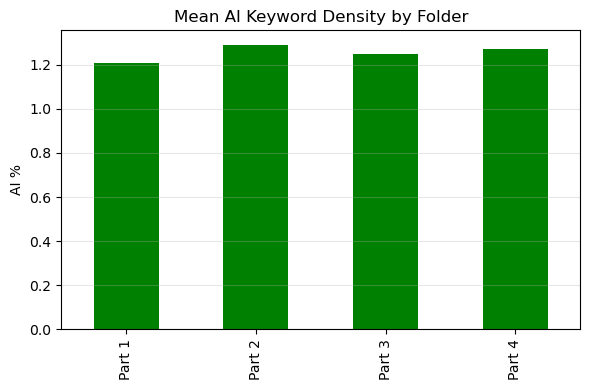

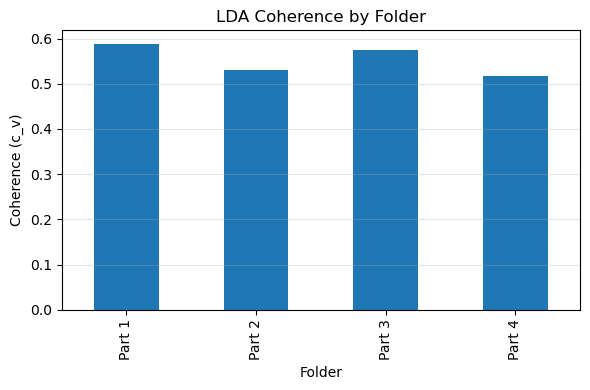

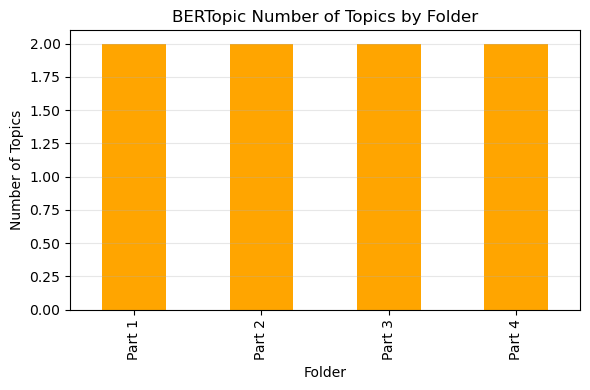

In [11]:
# Plot AI Density
plt.figure(figsize=(6,4))
pd.Series({k: np.mean(v) for k,v in ai_density_results.items()}).plot.bar(color='green')
plt.title('Mean AI Keyword Density by Folder')
plt.ylabel('AI %')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('results/ai_density_comparison.png')
plt.show()

# Plot LDA coherence
plt.figure(figsize=(6,4))
compare['LDA_Coherence'].plot.bar()
plt.title('LDA Coherence by Folder')
plt.ylabel('Coherence (c_v)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('results/lda_coherence_comparison.png')
plt.show()

# Plot BERTopic topic count
plt.figure(figsize=(6,4))
compare['BERTopic_Topics'].plot.bar(color='orange')
plt.title('BERTopic Number of Topics by Folder')
plt.ylabel('Number of Topics')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('results/bertopic_count_comparison.png')
plt.show()
